In [1]:
# EV Sales Analysis Notebook

In [2]:
# 1. Import Necessary Libraries  

import sqlite3
import pandas as pd

In [3]:
# 2. Connect to SQLite database
db_conn = sqlite3.connect("ev_sales.db")
cursor = db_conn.cursor()

In [4]:
# 3. Load EV Sales Dataset

df = pd.read_csv("7. Electric Vehicle (EV) Sales and Adoption.csv")
df.head()  # Preview first few rows

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue
0,2023-07,Oceania,Toyota,i4,Crossover,62,6,High Income,No,260,3699780
1,2023-03,Oceania,Toyota,Leaf,Truck,70,19,High Income,Yes,347,7801424
2,2023-05,North America,Toyota,ID.5,Crossover,81,13,Middle Income,No,294,4813013
3,2023-02,Oceania,Tesla,Corolla EV,Truck,73,4,High Income,Yes,281,7484912
4,2023-10,North America,BYD,Leaf,Coupe,52,4,High Income,No,166,4025360


In [5]:
# 4. Store Data in SQLite

df.to_sql("ev_sales", db_conn, if_exists="replace", index=False)

531

In [6]:
# 5. Verify Table Creation

tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

# Display results cleanly
print("Existing Tables in Database:")
for table in tables:
    print("-", table[0])  # Extract table name from tuple

Existing Tables in Database:
- ev_sales


In [7]:
# 6. Preview Sample EV Sales Data

sample_data = cursor.execute("SELECT * FROM ev_sales LIMIT 5;").fetchall()

print("Sample EV Sales Records:")
for row in sample_data:
    print("•", row)  # Formats output with bullet points for clarity

Sample EV Sales Records:
• ('2023-07', 'Oceania', 'Toyota', 'i4', 'Crossover', 62, 6, 'High Income', 'No', 260, 3699780)
• ('2023-03', 'Oceania', 'Toyota', 'Leaf', 'Truck', 70, 19, 'High Income', 'Yes', 347, 7801424)
• ('2023-05', 'North America', 'Toyota', 'ID.5', 'Crossover', 81, 13, 'Middle Income', 'No', 294, 4813013)
• ('2023-02', 'Oceania', 'Tesla', 'Corolla EV', 'Truck', 73, 4, 'High Income', 'Yes', 281, 7484912)
• ('2023-10', 'North America', 'BYD', 'Leaf', 'Coupe', 52, 4, 'High Income', 'No', 166, 4025360)


In [8]:
# 7. Check Total EV Sales Records

total_records = cursor.execute("SELECT COUNT(*) FROM ev_sales;").fetchone()[0]

print(f"Total records in EV Sales dataset: {total_records}")

Total records in EV Sales dataset: 531


In [17]:
# 8. Top EV Models by Sales & Revenue

query_top_models = """
SELECT Brand, Model, SUM(Units_Sold) AS Total_Sales, SUM(Revenue) AS Total_Revenue
FROM ev_sales
GROUP BY Brand, Model
ORDER BY Total_Sales DESC;
"""

df_top_models = pd.read_sql_query(query_top_models, db_conn)
print("Top EV Models by Units Sold & Revenue:")
print(df_top_models.head())  # Display first few rows neatly

Top EV Models by Units Sold & Revenue:
     Brand    Model  Total_Sales  Total_Revenue
0      Kia     Leaf         2471       56955608
1  Hyundai  Model 3         2165       43707108
2     Ford   Rio EV         2153       43003113
3     Ford       iX         2032       47246058
4     Ford   Atto 3         1962       43345674


In [10]:
# 9. Monthly EV Sales Summary

query_monthly_sales = """
SELECT Date, SUM(Units_Sold) AS Monthly_Sales
FROM ev_sales
GROUP BY Date
ORDER BY Date;
"""

df_monthly_sales = pd.read_sql_query(query_monthly_sales, db_conn)

print("Monthly EV Sales Overview:")
print(df_monthly_sales.head())  # Display first few rows cleanly

Monthly EV Sales Overview:
      Date  Monthly_Sales
0  2023-01          12106
1  2023-02          11200
2  2023-03           7985
3  2023-04           7855
4  2023-05          10146


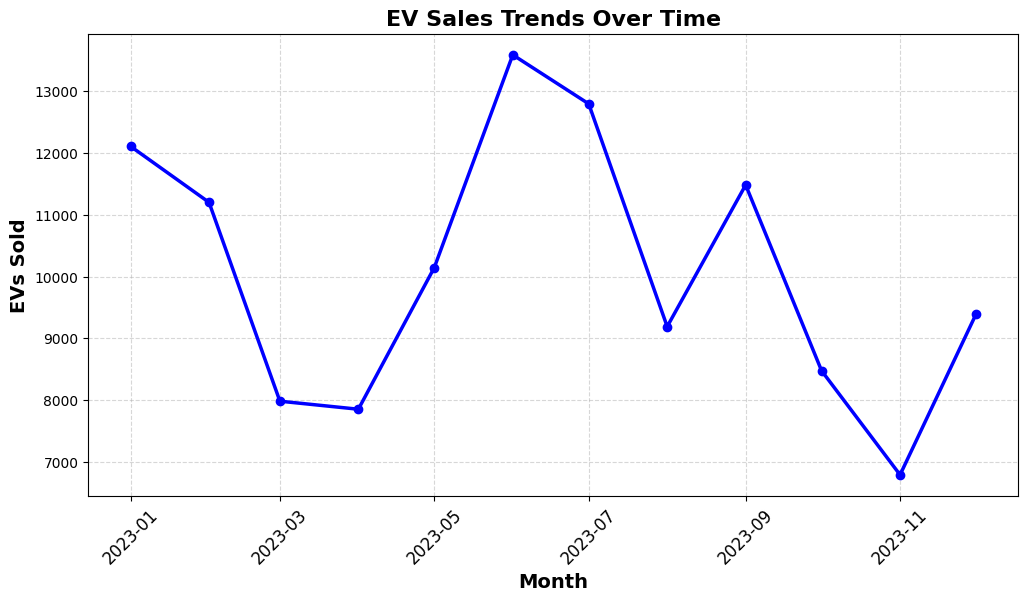

In [22]:
# 10. Monthly EV Sales Growth Analysis

import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format for better plotting
df_monthly_sales["Date"] = pd.to_datetime(df_monthly_sales["Date"])

plt.figure(figsize=(12,6))
plt.plot(df_monthly_sales["Date"], df_monthly_sales["Monthly_Sales"], marker='o', linestyle='-', color='blue', linewidth=2.5)

plt.xlabel("Month", fontsize=14, fontweight="bold")
plt.ylabel("EVs Sold", fontsize=14, fontweight="bold")
plt.title("EV Sales Trends Over Time", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

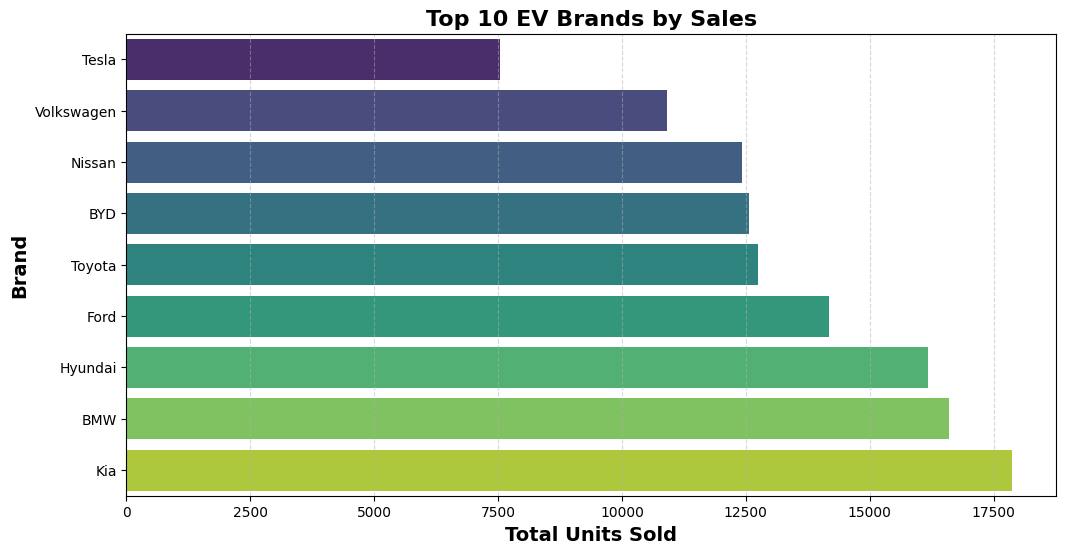

In [23]:
# 11. Top 10 EV Brands by Total Sales

import seaborn as sns
import matplotlib.pyplot as plt

query_top_brands = """
SELECT Brand, SUM(Units_Sold) AS Total_Sales
FROM ev_sales
GROUP BY Brand
ORDER BY Total_Sales DESC
LIMIT 10;
"""

df_brands = pd.read_sql_query(query_top_brands, db_conn)
df_brands = df_brands.sort_values(by="Total_Sales", ascending=True)  

plt.figure(figsize=(12,6))
sns.barplot(x="Total_Sales", y="Brand", data=df_brands, hue="Brand", palette="viridis", legend=False)

plt.xlabel("Total Units Sold", fontsize=14, fontweight="bold")
plt.ylabel("Brand", fontsize=14, fontweight="bold")
plt.title("Top 10 EV Brands by Sales", fontsize=16, fontweight="bold")
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

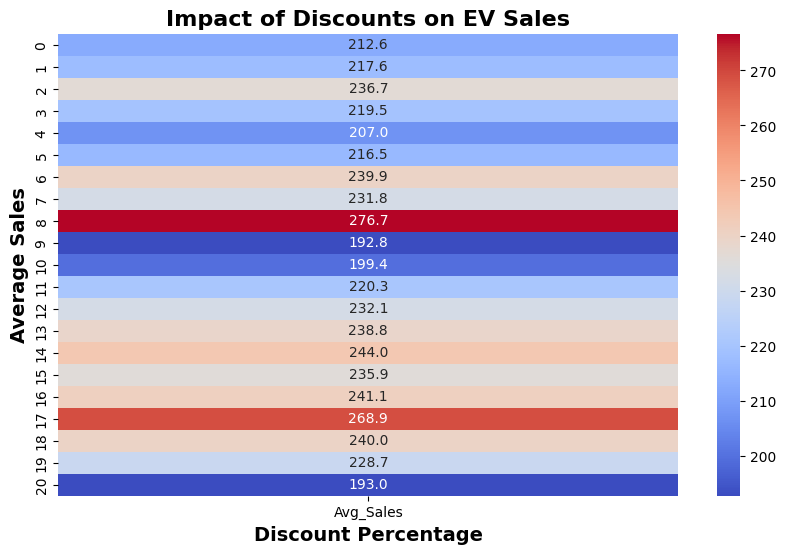

In [24]:
# 12. Impact of Discounts on EV Sales

import seaborn as sns
import matplotlib.pyplot as plt

query_discounts = """
SELECT Discount_Percentage, AVG(Units_Sold) AS Avg_Sales
FROM ev_sales
GROUP BY Discount_Percentage;
"""

df_discounts = pd.read_sql_query(query_discounts, db_conn)

df_discounts = df_discounts.set_index("Discount_Percentage")

plt.figure(figsize=(10,6))
sns.heatmap(df_discounts, cmap="coolwarm", annot=True, fmt=".1f")

plt.xlabel("Discount Percentage", fontsize=14, fontweight="bold")
plt.ylabel("Average Sales", fontsize=14, fontweight="bold")
plt.title("Impact of Discounts on EV Sales", fontsize=16, fontweight="bold")

plt.show()

In [14]:
# 13. Total Revenue Generated Across All EV Models

query_total_revenue = """
SELECT SUM(revenue) AS total_revenue_overall
FROM ev_sales;
"""

df_total_revenue = pd.read_sql_query(query_total_revenue, db_conn)

# Display structured output
total_revenue = df_total_revenue.iloc[0, 0]  # Extract value cleanly
print(f"Total Revenue (All Models Combined): ${total_revenue:,.2f}")

Total Revenue (All Models Combined): $2,611,862,520.00


In [15]:
# 14. Top 5 EV Models Ranked by Revenue

query_top5_models = """
SELECT Model,
       SUM(Units_Sold) AS Total_Units_Sold,
       SUM(Revenue) AS Total_Revenue
FROM ev_sales
GROUP BY Model
ORDER BY Total_Revenue DESC
LIMIT 5;
"""

df_top5_models = pd.read_sql_query(query_top5_models, db_conn)

print("Top 5 EV Models by Revenue:")
print(df_top5_models.to_string(index=False))

Top 5 EV Models by Revenue:
  Model  Total_Units_Sold  Total_Revenue
   Leaf             12495      273175852
 Atto 3             11391      248649088
Model 3             10884      220426112
 Rio EV             10501      212827826
 Han EV              8070      185282379


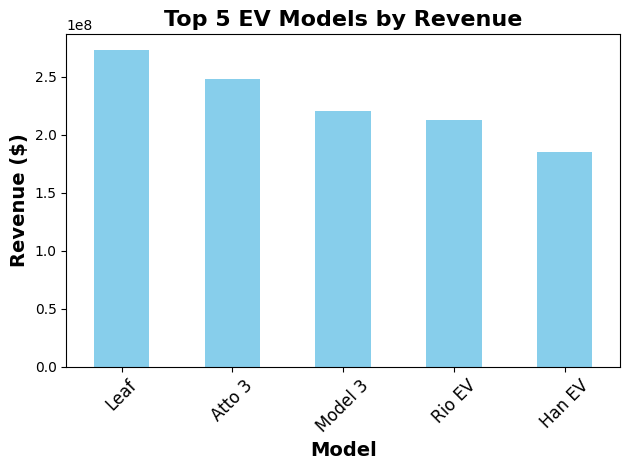

In [16]:
# 15. Highest-Grossing EV Models  

import matplotlib.pyplot as plt

df_top5_models.plot(
    kind='bar', 
    x='Model', 
    y='Total_Revenue', 
    color='skyblue', 
    legend=False
)

plt.title("Top 5 EV Models by Revenue", fontsize=16, fontweight="bold")
plt.xlabel("Model", fontsize=14, fontweight="bold")
plt.ylabel("Revenue ($)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()
plt.savefig("top5_revenue_chart.png", dpi=300)
plt.show()